<a href="https://colab.research.google.com/github/Lazizbek97/lego_data_MATPLOTIB/blob/master/legodata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libs

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

Reading colors.csv

In [6]:
colors = pd.read_csv("datas/colors.csv")
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


Number of colors(only unique ones)

In [7]:
colors['name'].nunique()

135

In [8]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


Reading sets.csv file

In [9]:
sets = pd.read_csv("datas/sets.csv")
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [10]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Yearly production of Lego by categories

In [20]:
sets[sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
sets.sort_values('num_parts', ascending=False)

Number of parts that has been produced each year

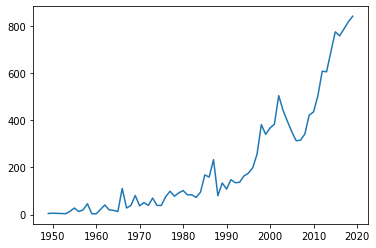

In [28]:
sorted_by_year = sets.groupby('year').count()
plt.plot(sorted_by_year.index[:-2], sorted_by_year.set_num[:-2])

The number of themes for each year

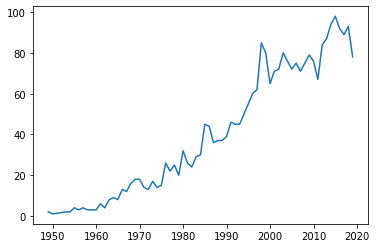

In [31]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
plt.plot(sorted_by_year.index[:-2], themes_by_year[:-2])

two graphs above are in one below

Text(0, 0.5, 'The number of themes')

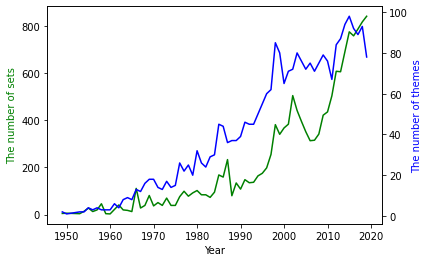

In [38]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sorted_by_year.index[:-2], sorted_by_year.set_num[:-2], 'green')
ax2.plot(sorted_by_year.index[:-2], themes_by_year[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('The number of sets', color='green')
ax2.set_ylabel('The number of themes', color='blue')

average number of parts for each year

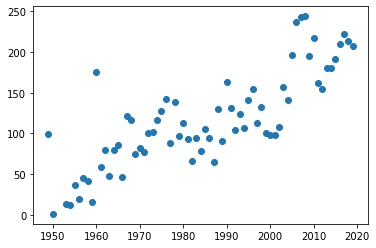

In [41]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

In [54]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


sets and themes files merged here

<BarContainer object of 10 artists>

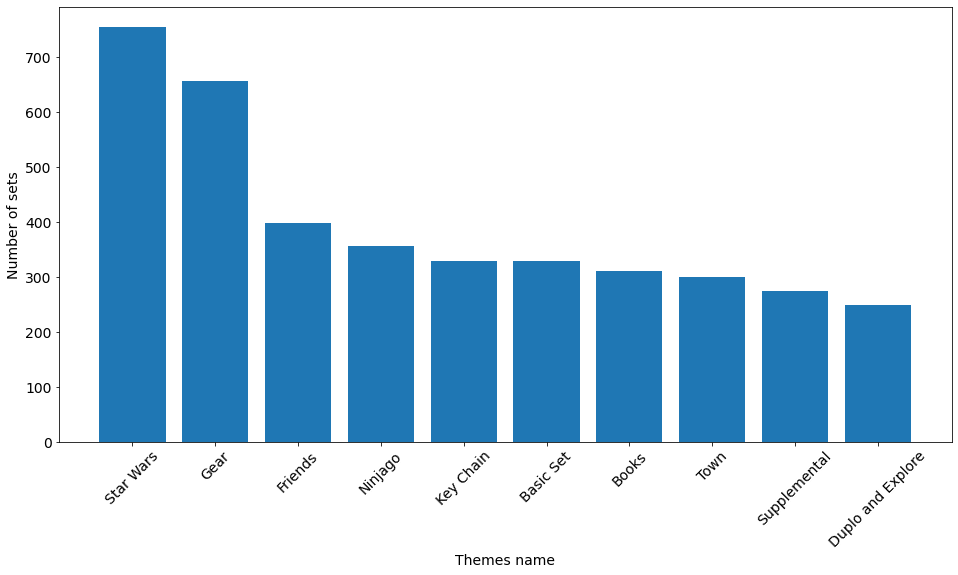

In [69]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Themes name', fontsize=14)
plt.ylabel('Number of sets', fontsize=14)
merged_df = pd.merge(set_theme_count, themes, on='id')
plt.bar(merged_df.name[:10], merged_df.set_count[:10])